# Data Visualization Basics - Week 1 Workshop

Effective data visualization is crucial for both data exploration and communicating insights. In this notebook, we'll master essential visualization techniques using matplotlib and seaborn.

## Learning Objectives
- Create effective exploratory visualizations
- Master matplotlib and seaborn for different chart types
- Design visualizations for different audiences
- Build interactive and publication-ready plots

Let's create some compelling visualizations!

## 1. Setup and Data Loading

In [1]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("🎨 Setting up visualization environment...")

# Load and prepare wine dataset
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target
wine_df['target_name'] = wine_df['target'].map({
    0: 'Class 0', 1: 'Class 1', 2: 'Class 2'
})

# Create additional derived features for visualization
wine_df['alcohol_category'] = pd.cut(wine_df['alcohol'], 
                                   bins=3, 
                                   labels=['Low', 'Medium', 'High'])

wine_df['quality_score'] = (
    wine_df['alcohol'] * 0.3 + 
    wine_df['flavanoids'] * 0.4 + 
    wine_df['color_intensity'] * 0.3
).round(2)

print("✅ Data loaded and prepared for visualization")
print(f"📊 Dataset shape: {wine_df.shape}")
print(f"🎯 Features available: {len(wine_df.columns)}")

# Quick preview
wine_df.head(3)

🎨 Setting up visualization environment...
✅ Data loaded and prepared for visualization
📊 Dataset shape: (178, 17)
🎯 Features available: 17


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_name,alcohol_category,quality_score
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,Class 0,High,7.18
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,Class 0,Medium,6.38
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,Class 0,Medium,6.95


## 2. Essential Chart Types

📊 ESSENTIAL CHART TYPES


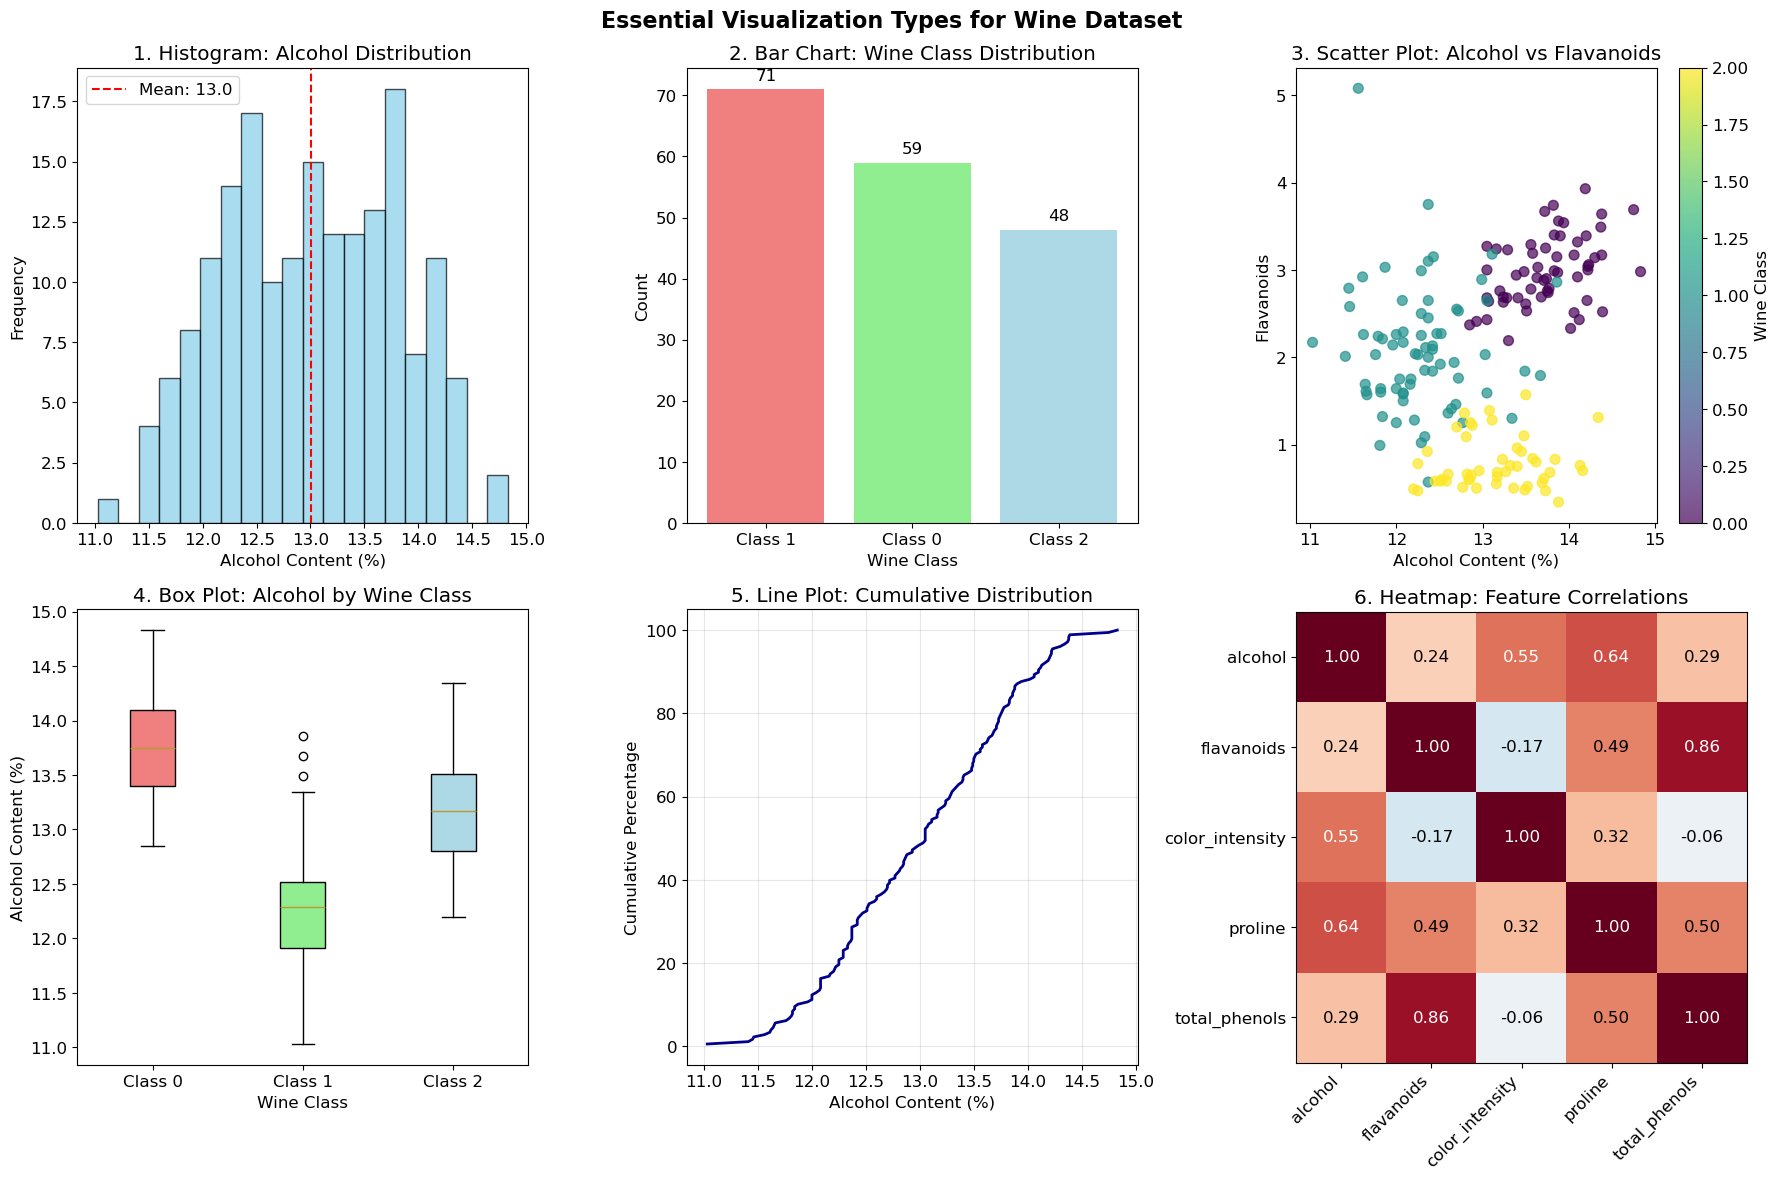

✅ Essential chart types demonstrated!
💡 Each chart type serves different analytical purposes:
   📊 Histogram: Shows distribution shape
   📈 Bar Chart: Compares categorical quantities
   🔍 Scatter Plot: Reveals relationships
   📦 Box Plot: Shows distribution by groups
   📉 Line Plot: Shows trends over sequences
   🌡️ Heatmap: Visualizes correlation matrices


In [2]:
print("📊 ESSENTIAL CHART TYPES")
print("=" * 25)

# Create a comprehensive figure with multiple chart types
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Essential Visualization Types for Wine Dataset', fontsize=16, fontweight='bold')

# 1. Histogram - Distribution of continuous variable
axes[0, 0].hist(wine_df['alcohol'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('1. Histogram: Alcohol Distribution')
axes[0, 0].set_xlabel('Alcohol Content (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(wine_df['alcohol'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {wine_df["alcohol"].mean():.1f}')
axes[0, 0].legend()

# 2. Bar Chart - Categorical counts
class_counts = wine_df['target_name'].value_counts()
bars = axes[0, 1].bar(class_counts.index, class_counts.values, 
                     color=['lightcoral', 'lightgreen', 'lightblue'])
axes[0, 1].set_title('2. Bar Chart: Wine Class Distribution')
axes[0, 1].set_xlabel('Wine Class')
axes[0, 1].set_ylabel('Count')
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{int(height)}', ha='center', va='bottom')

# 3. Scatter Plot - Relationship between two continuous variables
scatter = axes[0, 2].scatter(wine_df['alcohol'], wine_df['flavanoids'], 
                           c=wine_df['target'], cmap='viridis', alpha=0.7, s=50)
axes[0, 2].set_title('3. Scatter Plot: Alcohol vs Flavanoids')
axes[0, 2].set_xlabel('Alcohol Content (%)')
axes[0, 2].set_ylabel('Flavanoids')
plt.colorbar(scatter, ax=axes[0, 2], label='Wine Class')

# 4. Box Plot - Distribution by category
box_data = [wine_df[wine_df['target_name'] == cls]['alcohol'] 
           for cls in wine_df['target_name'].unique()]
bp = axes[1, 0].boxplot(box_data, labels=wine_df['target_name'].unique(), patch_artist=True)
colors = ['lightcoral', 'lightgreen', 'lightblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 0].set_title('4. Box Plot: Alcohol by Wine Class')
axes[1, 0].set_xlabel('Wine Class')
axes[1, 0].set_ylabel('Alcohol Content (%)')

# 5. Line Plot - Trend or series data
# Create a trend by sorting alcohol and showing cumulative percentage
alcohol_sorted = wine_df['alcohol'].sort_values().reset_index(drop=True)
cumulative_pct = np.arange(1, len(alcohol_sorted) + 1) / len(alcohol_sorted) * 100
axes[1, 1].plot(alcohol_sorted, cumulative_pct, linewidth=2, color='darkblue')
axes[1, 1].set_title('5. Line Plot: Cumulative Distribution')
axes[1, 1].set_xlabel('Alcohol Content (%)')
axes[1, 1].set_ylabel('Cumulative Percentage')
axes[1, 1].grid(True, alpha=0.3)

# 6. Heatmap - Correlation matrix
# Select key features for correlation
key_features = ['alcohol', 'flavanoids', 'color_intensity', 'proline', 'total_phenols']
corr_matrix = wine_df[key_features].corr()
im = axes[1, 2].imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
axes[1, 2].set_title('6. Heatmap: Feature Correlations')
axes[1, 2].set_xticks(range(len(key_features)))
axes[1, 2].set_yticks(range(len(key_features)))
axes[1, 2].set_xticklabels(key_features, rotation=45, ha='right')
axes[1, 2].set_yticklabels(key_features)

# Add correlation values to heatmap
for i in range(len(key_features)):
    for j in range(len(key_features)):
        axes[1, 2].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha='center', va='center', 
                       color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')

plt.tight_layout()
plt.show()

print("✅ Essential chart types demonstrated!")
print("💡 Each chart type serves different analytical purposes:")
print("   📊 Histogram: Shows distribution shape")
print("   📈 Bar Chart: Compares categorical quantities")
print("   🔍 Scatter Plot: Reveals relationships")
print("   📦 Box Plot: Shows distribution by groups")
print("   📉 Line Plot: Shows trends over sequences")
print("   🌡️ Heatmap: Visualizes correlation matrices")

## 3. Advanced Seaborn Visualizations

🎨 ADVANCED SEABORN VISUALIZATIONS


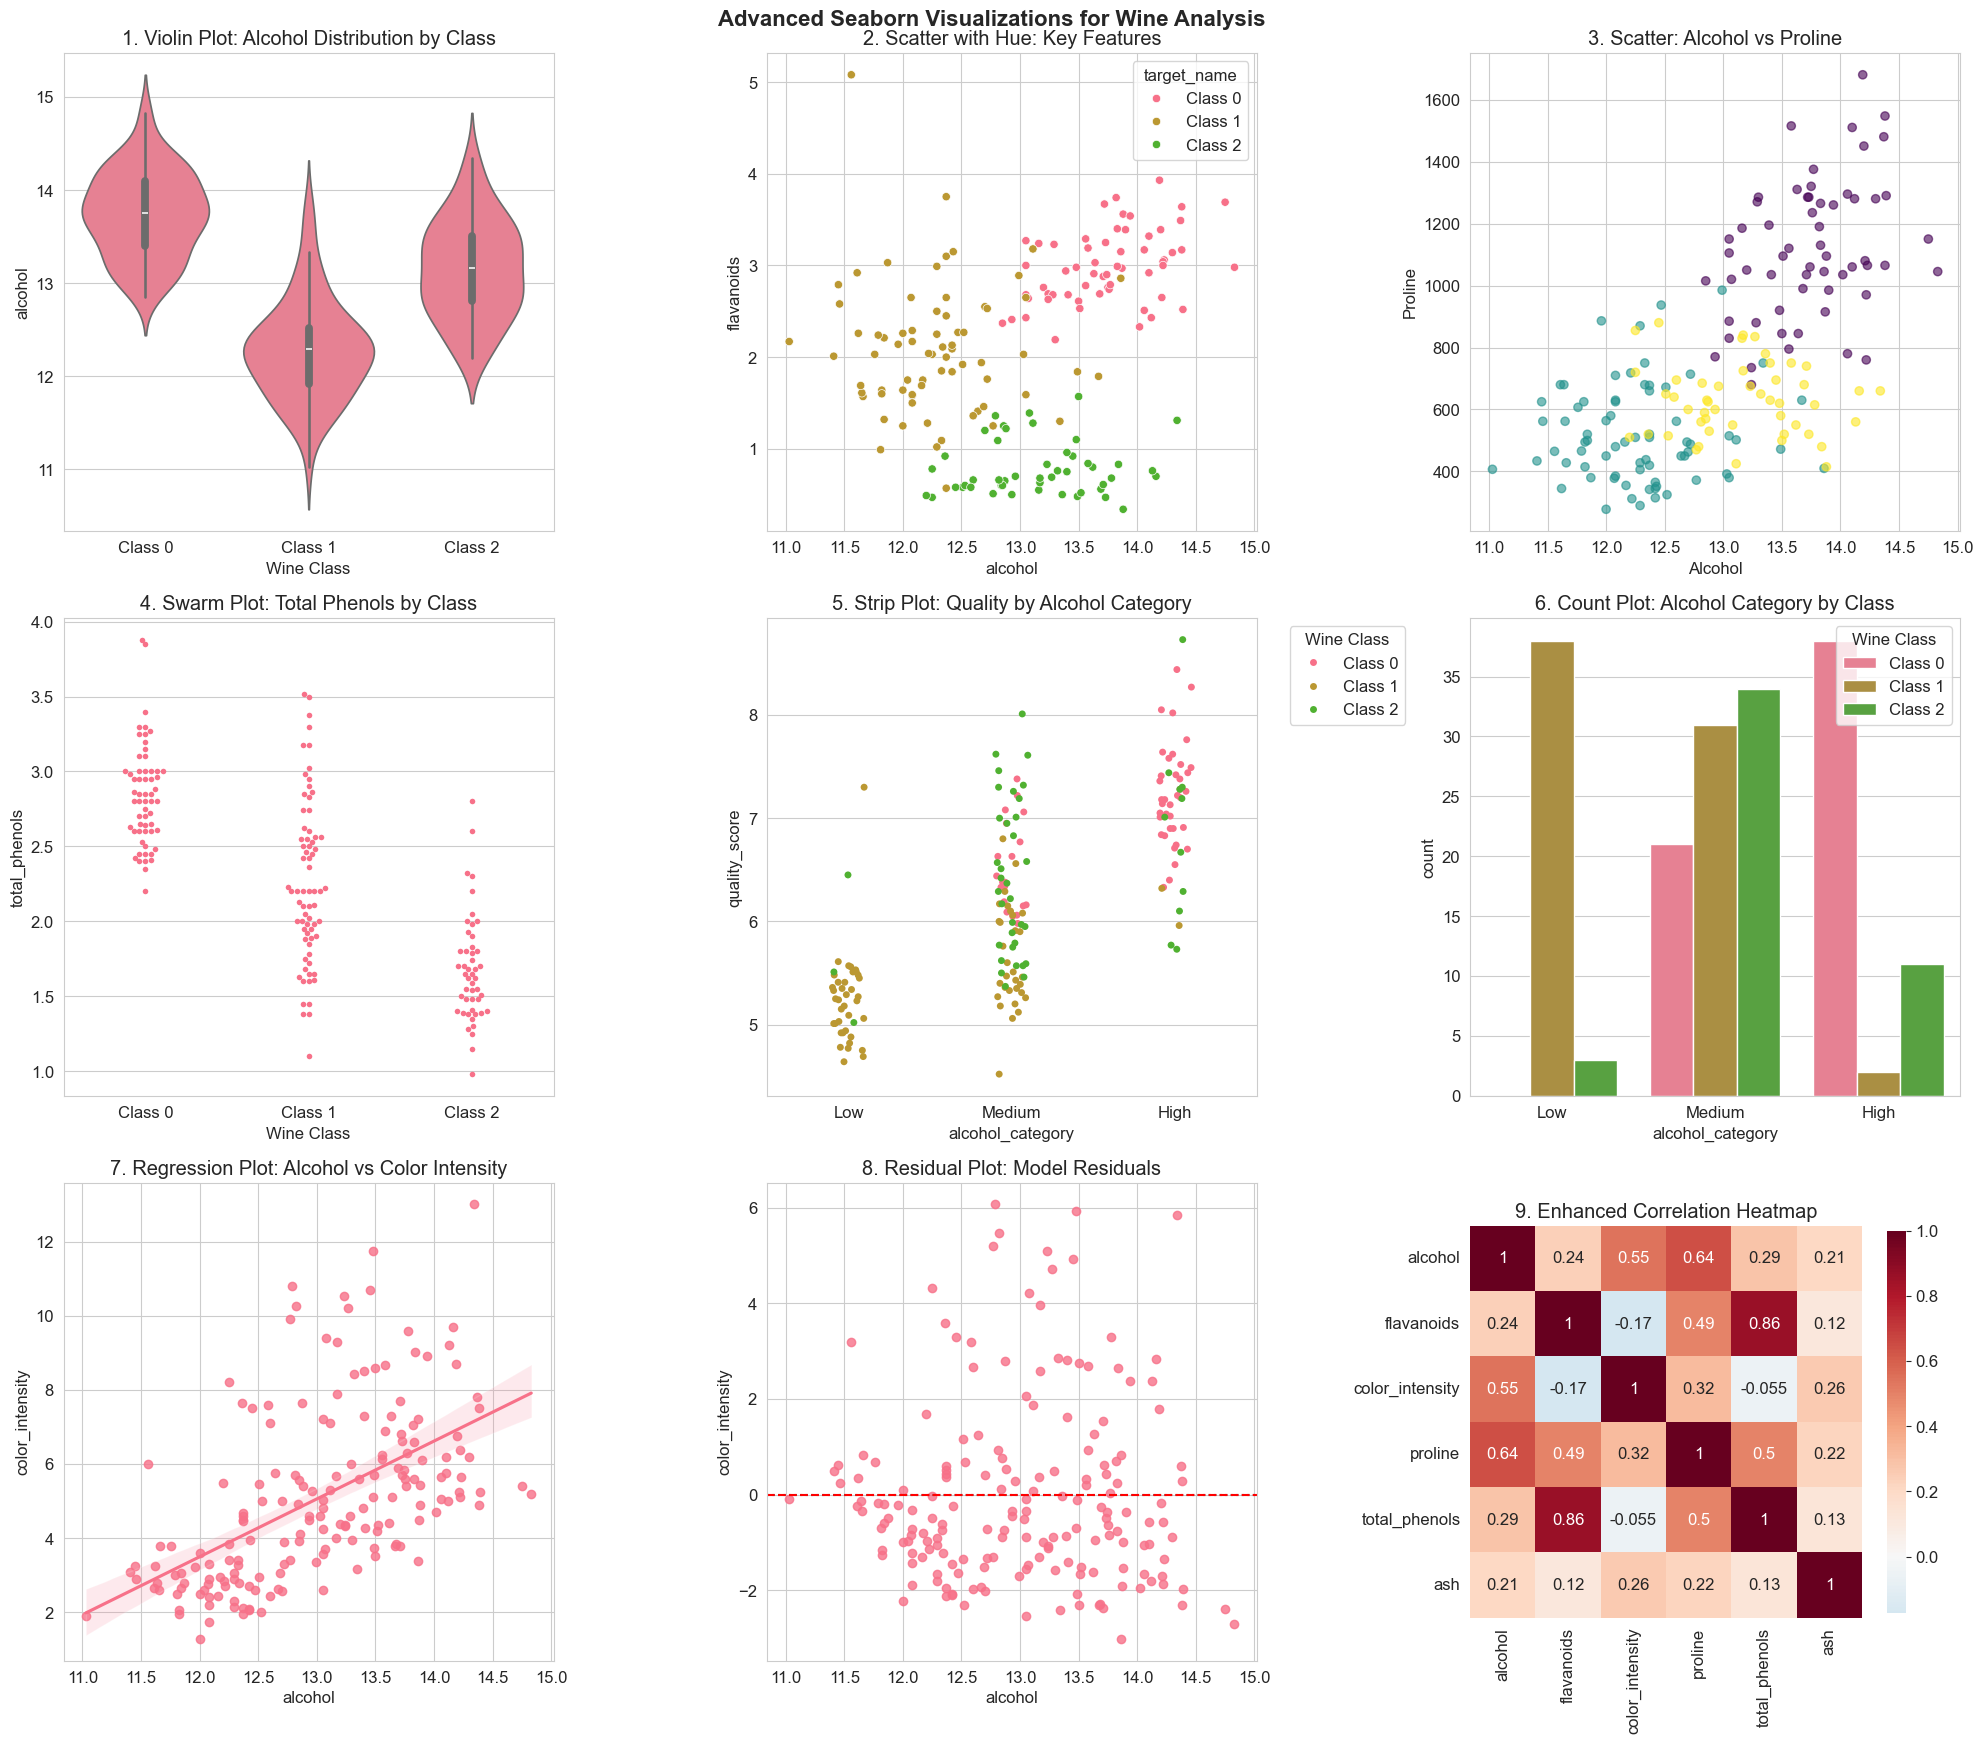

✅ Advanced visualizations created!
🎯 Key insights from advanced plots:
   🎻 Violin plots show distribution shape differences
   🎨 Hue mapping reveals class patterns
   📍 Swarm plots preserve individual data points
   📈 Regression plots show linear relationships
   🔍 Residual plots help assess model assumptions


In [3]:
print("🎨 ADVANCED SEABORN VISUALIZATIONS")
print("=" * 35)

# Set up seaborn style
sns.set_style("whitegrid")

# Create advanced visualizations
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('Advanced Seaborn Visualizations for Wine Analysis', fontsize=16, fontweight='bold')

# 1. Violin Plot - Distribution shape by category
sns.violinplot(data=wine_df, x='target_name', y='alcohol', ax=axes[0, 0])
axes[0, 0].set_title('1. Violin Plot: Alcohol Distribution by Class')
axes[0, 0].set_xlabel('Wine Class')

# 2. Scatter with hue
sns.scatterplot(data=wine_df, x='alcohol', y='flavanoids', 
              hue='target_name', ax=axes[0, 1])
axes[0, 1].set_title('2. Scatter with Hue: Key Features')

# 3. Joint style scatter
axes[0, 2].scatter(wine_df['alcohol'], wine_df['proline'], 
                  c=wine_df['target'], cmap='viridis', alpha=0.6)
axes[0, 2].set_title('3. Scatter: Alcohol vs Proline')
axes[0, 2].set_xlabel('Alcohol')
axes[0, 2].set_ylabel('Proline')

# 4. Swarm Plot - Show all points
sns.swarmplot(data=wine_df, x='target_name', y='total_phenols', 
             size=4, ax=axes[1, 0])
axes[1, 0].set_title('4. Swarm Plot: Total Phenols by Class')
axes[1, 0].set_xlabel('Wine Class')

# 5. Strip Plot with jitter
sns.stripplot(data=wine_df, x='alcohol_category', y='quality_score', 
             hue='target_name', jitter=True, ax=axes[1, 1])
axes[1, 1].set_title('5. Strip Plot: Quality by Alcohol Category')
axes[1, 1].legend(title='Wine Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# 6. Count Plot - Categorical frequency
sns.countplot(data=wine_df, x='alcohol_category', hue='target_name', ax=axes[1, 2])
axes[1, 2].set_title('6. Count Plot: Alcohol Category by Class')
axes[1, 2].legend(title='Wine Class')

# 7. Regression Plot
sns.regplot(data=wine_df, x='alcohol', y='color_intensity', ax=axes[2, 0])
axes[2, 0].set_title('7. Regression Plot: Alcohol vs Color Intensity')

# 8. Residual Plot
sns.residplot(data=wine_df, x='alcohol', y='color_intensity', ax=axes[2, 1])
axes[2, 1].set_title('8. Residual Plot: Model Residuals')
axes[2, 1].axhline(y=0, color='r', linestyle='--')

# 9. Feature correlation heatmap (enhanced)
correlation_features = ['alcohol', 'flavanoids', 'color_intensity', 
                       'proline', 'total_phenols', 'ash']
corr_data = wine_df[correlation_features].corr()
sns.heatmap(corr_data, annot=True, cmap='RdBu_r', center=0, 
           square=True, ax=axes[2, 2], cbar_kws={"shrink": .8})
axes[2, 2].set_title('9. Enhanced Correlation Heatmap')

plt.tight_layout()
plt.show()

print("✅ Advanced visualizations created!")
print("🎯 Key insights from advanced plots:")
print("   🎻 Violin plots show distribution shape differences")
print("   🎨 Hue mapping reveals class patterns")
print("   📍 Swarm plots preserve individual data points")
print("   📈 Regression plots show linear relationships")
print("   🔍 Residual plots help assess model assumptions")

## 4. Statistical Visualizations

📈 STATISTICAL VISUALIZATIONS


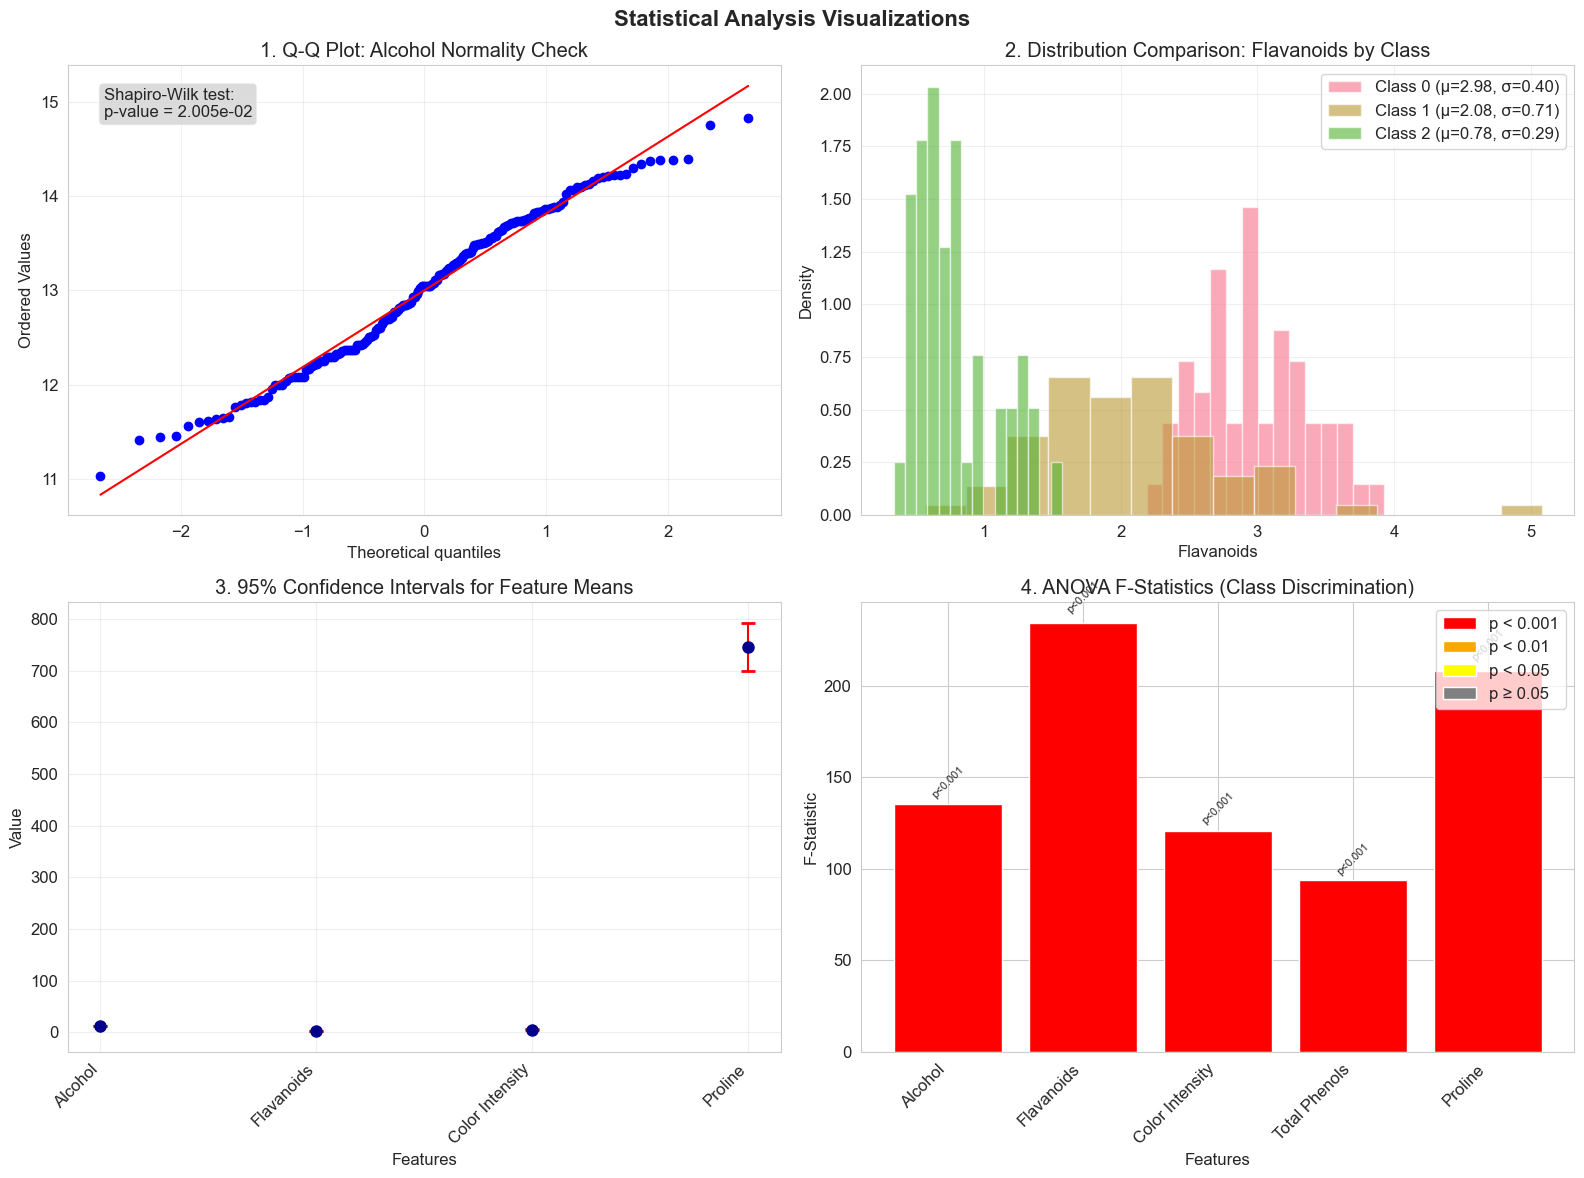

✅ Statistical visualizations complete!
📊 Statistical insights:
   📐 Q-Q plot shows non-normal distribution for alcohol
   🎯 5 features show significant class differences
   📈 Highest discriminative power: flavanoids
   💡 Red bars indicate strongest class discrimination


In [4]:
print("📈 STATISTICAL VISUALIZATIONS")
print("=" * 30)

# Create statistical analysis visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Statistical Analysis Visualizations', fontsize=16, fontweight='bold')

# 1. Q-Q Plot for normality assessment
feature_for_qq = 'alcohol'
stats.probplot(wine_df[feature_for_qq], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title(f'1. Q-Q Plot: {feature_for_qq.title()} Normality Check')
axes[0, 0].grid(True, alpha=0.3)

# Add normality test result
stat, p_value = stats.shapiro(wine_df[feature_for_qq])
normality_text = f'Shapiro-Wilk test:\np-value = {p_value:.3e}'
axes[0, 0].text(0.05, 0.95, normality_text, transform=axes[0, 0].transAxes, 
               bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8),
               verticalalignment='top')

# 2. Distribution comparison with statistical overlay
feature_for_dist = 'flavanoids'
for i, class_name in enumerate(wine_df['target_name'].unique()):
    class_data = wine_df[wine_df['target_name'] == class_name][feature_for_dist]
    axes[0, 1].hist(class_data, alpha=0.6, bins=15, 
                   label=f'{class_name} (μ={class_data.mean():.2f}, σ={class_data.std():.2f})',
                   density=True)

axes[0, 1].set_title(f'2. Distribution Comparison: {feature_for_dist.title()} by Class')
axes[0, 1].set_xlabel(feature_for_dist.title())
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Confidence Intervals
features_for_ci = ['alcohol', 'flavanoids', 'color_intensity', 'proline']
means = []
conf_intervals = []

for feature in features_for_ci:
    data = wine_df[feature]
    mean = data.mean()
    sem = stats.sem(data)  # Standard error of mean
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
    
    means.append(mean)
    conf_intervals.append((ci[1] - mean, mean - ci[0]))  # Upper and lower error

# Plot confidence intervals
x_pos = range(len(features_for_ci))
errors = list(zip(*conf_intervals))
axes[1, 0].errorbar(x_pos, means, yerr=errors, fmt='o', capsize=5, capthick=2, 
                   color='darkblue', ecolor='red', markersize=8)
axes[1, 0].set_title('3. 95% Confidence Intervals for Feature Means')
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Value')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels([f.replace('_', ' ').title() for f in features_for_ci], 
                          rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3)

# 4. Statistical test visualization (ANOVA)
from scipy.stats import f_oneway

features_for_anova = ['alcohol', 'flavanoids', 'color_intensity', 'total_phenols', 'proline']
f_statistics = []
p_values = []

for feature in features_for_anova:
    groups = [wine_df[wine_df['target_name'] == cls][feature] 
              for cls in wine_df['target_name'].unique()]
    f_stat, p_val = f_oneway(*groups)
    f_statistics.append(f_stat)
    p_values.append(p_val)

# Create significance visualization
colors = ['red' if p < 0.001 else 'orange' if p < 0.01 else 'yellow' if p < 0.05 else 'gray' 
          for p in p_values]
bars = axes[1, 1].bar(range(len(features_for_anova)), f_statistics, color=colors)
axes[1, 1].set_title('4. ANOVA F-Statistics (Class Discrimination)')
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('F-Statistic')
axes[1, 1].set_xticks(range(len(features_for_anova)))
axes[1, 1].set_xticklabels([f.replace('_', ' ').title() for f in features_for_anova], 
                          rotation=45, ha='right')

# Add significance legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='p < 0.001'),
                  Patch(facecolor='orange', label='p < 0.01'),
                  Patch(facecolor='yellow', label='p < 0.05'),
                  Patch(facecolor='gray', label='p ≥ 0.05')]
axes[1, 1].legend(handles=legend_elements, loc='upper right')

# Add p-value annotations
for i, (bar, p_val) in enumerate(zip(bars, p_values)):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + height*0.02,
                   f'p={p_val:.3f}' if p_val >= 0.001 else 'p<0.001',
                   ha='center', va='bottom', fontsize=8, rotation=45)

plt.tight_layout()
plt.show()

print("✅ Statistical visualizations complete!")
print("📊 Statistical insights:")
print(f"   📐 Q-Q plot shows {'normal' if p_value > 0.05 else 'non-normal'} distribution for {feature_for_qq}")
print(f"   🎯 {len([p for p in p_values if p < 0.05])} features show significant class differences")
print(f"   📈 Highest discriminative power: {features_for_anova[np.argmax(f_statistics)]}")
print("   💡 Red bars indicate strongest class discrimination")

## 5. Publication-Ready Visualizations

🎨 PUBLICATION-READY VISUALIZATIONS


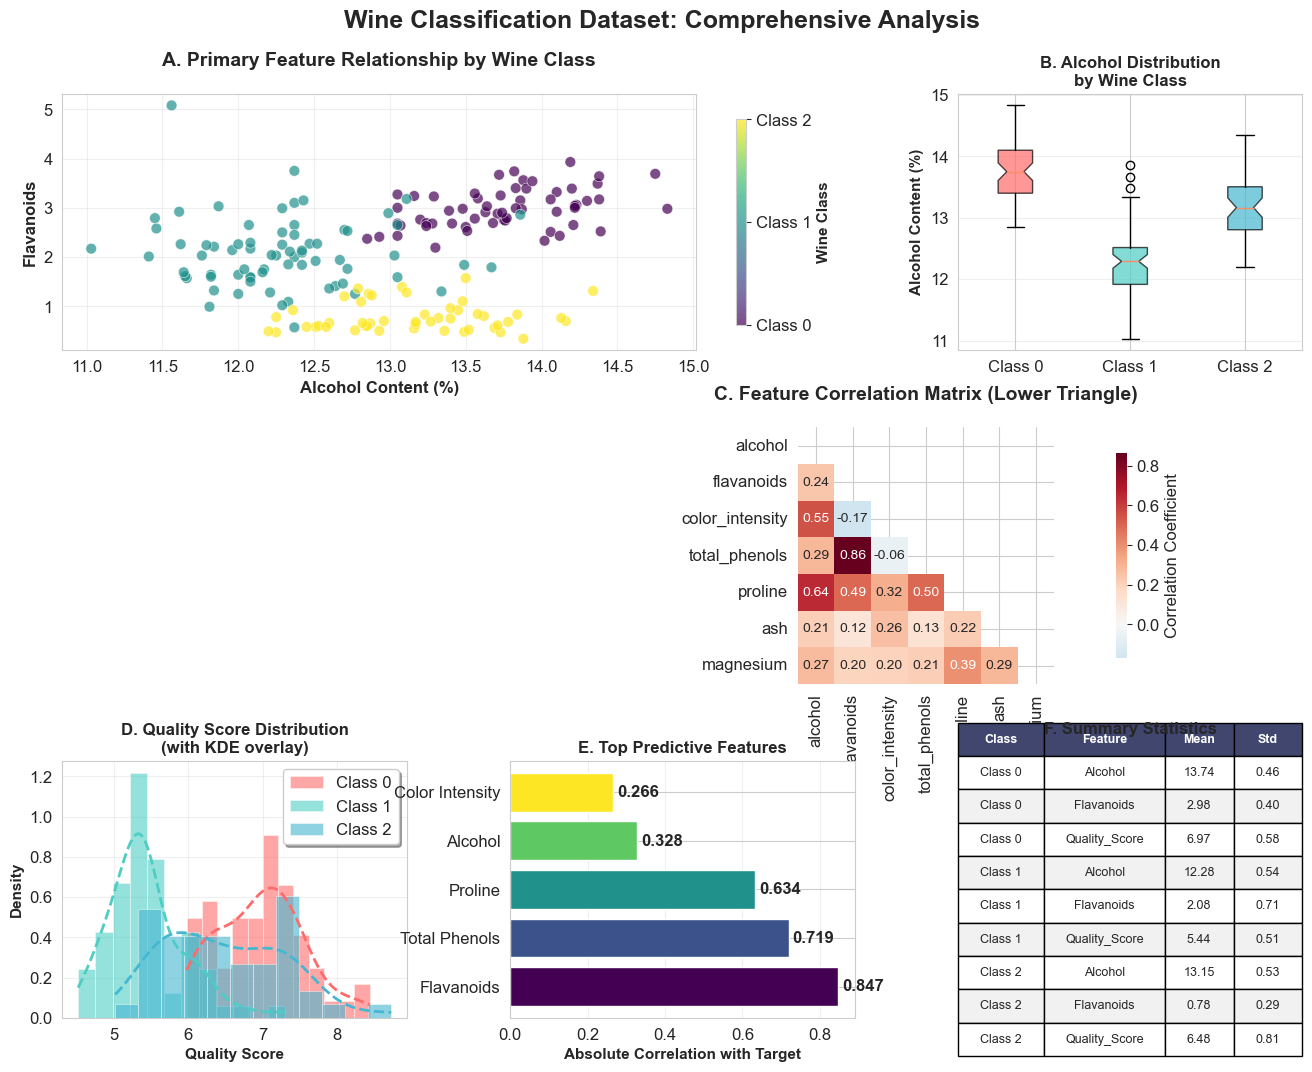

✅ Publication-ready visualization created!
📊 Professional visualization features:
   🎨 Consistent color scheme across all plots
   📐 Proper spacing and typography
   🏷️ Clear labeling and titles
   📈 Multiple visualization types in one figure
   📋 Summary statistics table
   🎯 Statistical overlays (KDE, correlation values)

💾 To save this figure for publication:
   plt.savefig('wine_analysis.png', dpi=300, bbox_inches='tight')
   plt.savefig('wine_analysis.pdf', bbox_inches='tight')  # Vector format


In [5]:
print("🎨 PUBLICATION-READY VISUALIZATIONS")
print("=" * 35)

# Set publication style
sns.set_palette("Set2")

# Create publication-quality figure
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Main title
fig.suptitle('Wine Classification Dataset: Comprehensive Analysis', 
             fontsize=18, fontweight='bold', y=0.95)

# 1. Main scatter plot with enhanced styling
ax1 = fig.add_subplot(gs[0, :2])
scatter = ax1.scatter(wine_df['alcohol'], wine_df['flavanoids'], 
                     c=wine_df['target'], cmap='viridis', 
                     s=60, alpha=0.7, edgecolors='white', linewidth=0.5)
ax1.set_xlabel('Alcohol Content (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Flavanoids', fontsize=12, fontweight='bold')
ax1.set_title('A. Primary Feature Relationship by Wine Class', 
              fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)

# Add colorbar with custom styling
cbar = plt.colorbar(scatter, ax=ax1, shrink=0.8)
cbar.set_label('Wine Class', fontsize=11, fontweight='bold')
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Class 0', 'Class 1', 'Class 2'])

# 2. Enhanced box plot
ax2 = fig.add_subplot(gs[0, 2])
bp = ax2.boxplot([wine_df[wine_df['target_name'] == cls]['alcohol'] 
                  for cls in wine_df['target_name'].unique()],
                 labels=['Class 0', 'Class 1', 'Class 2'],
                 patch_artist=True, notch=True)

# Custom box plot colors
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_title('B. Alcohol Distribution\nby Wine Class', 
              fontsize=12, fontweight='bold')
ax2.set_ylabel('Alcohol Content (%)', fontsize=11, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Correlation matrix with custom styling
ax3 = fig.add_subplot(gs[1, :])
correlation_features = ['alcohol', 'flavanoids', 'color_intensity', 
                       'total_phenols', 'proline', 'ash', 'magnesium']
corr_matrix = wine_df[correlation_features].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
           square=True, ax=ax3, cbar_kws={"shrink": .8, "label": "Correlation Coefficient"},
           fmt='.2f', annot_kws={'size': 10})
ax3.set_title('C. Feature Correlation Matrix (Lower Triangle)', 
              fontsize=14, fontweight='bold', pad=20)

# 4. Enhanced distribution plot
ax4 = fig.add_subplot(gs[2, 0])
for i, class_name in enumerate(wine_df['target_name'].unique()):
    class_data = wine_df[wine_df['target_name'] == class_name]['quality_score']
    ax4.hist(class_data, alpha=0.6, bins=12, label=class_name, 
            color=colors[i], density=True, edgecolor='white', linewidth=0.5)
    
    # Add KDE overlay
    x_kde = np.linspace(class_data.min(), class_data.max(), 100)
    kde = stats.gaussian_kde(class_data)
    ax4.plot(x_kde, kde(x_kde), color=colors[i], linewidth=2, linestyle='--')

ax4.set_xlabel('Quality Score', fontsize=11, fontweight='bold')
ax4.set_ylabel('Density', fontsize=11, fontweight='bold')
ax4.set_title('D. Quality Score Distribution\n(with KDE overlay)', 
              fontsize=12, fontweight='bold')
ax4.legend(frameon=True, fancybox=True, shadow=True)
ax4.grid(True, alpha=0.3)

# 5. Feature importance visualization
ax5 = fig.add_subplot(gs[2, 1])
feature_target_corr = wine_df[correlation_features].corrwith(wine_df['target']).abs()
top_features = feature_target_corr.nlargest(5)

bars = ax5.barh(range(len(top_features)), top_features.values, 
               color=plt.cm.viridis(np.linspace(0, 1, len(top_features))))
ax5.set_yticks(range(len(top_features)))
ax5.set_yticklabels([f.replace('_', ' ').title() for f in top_features.index])
ax5.set_xlabel('Absolute Correlation with Target', fontsize=11, fontweight='bold')
ax5.set_title('E. Top Predictive Features', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_features.values)):
    ax5.text(value + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{value:.3f}', va='center', fontweight='bold')

# 6. Summary statistics table
ax6 = fig.add_subplot(gs[2, 2])
ax6.axis('off')

# Create summary statistics
summary_stats = wine_df.groupby('target_name')[['alcohol', 'flavanoids', 'quality_score']].agg(['mean', 'std'])
summary_stats = summary_stats.round(2)

# Create table
table_data = []
for class_name in summary_stats.index:
    for feature in ['alcohol', 'flavanoids', 'quality_score']:
        mean_val = summary_stats.loc[class_name, (feature, 'mean')]
        std_val = summary_stats.loc[class_name, (feature, 'std')]
        table_data.append([class_name, feature.title(), f'{mean_val:.2f}', f'{std_val:.2f}'])

# Display table
table = ax6.table(cellText=table_data,
                 colLabels=['Class', 'Feature', 'Mean', 'Std'],
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.25, 0.35, 0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style the table
for i in range(len(table_data) + 1):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0:  # Header row
            cell.set_facecolor('#40466e')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#f1f1f2' if i % 2 == 0 else 'white')

ax6.set_title('F. Summary Statistics', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("✅ Publication-ready visualization created!")
print("📊 Professional visualization features:")
print("   🎨 Consistent color scheme across all plots")
print("   📐 Proper spacing and typography")
print("   🏷️ Clear labeling and titles")
print("   📈 Multiple visualization types in one figure")
print("   📋 Summary statistics table")
print("   🎯 Statistical overlays (KDE, correlation values)")

# Save figure (demonstration)
print("\n💾 To save this figure for publication:")
print("   plt.savefig('wine_analysis.png', dpi=300, bbox_inches='tight')")
print("   plt.savefig('wine_analysis.pdf', bbox_inches='tight')  # Vector format")

## 6. Interactive Visualization Concepts

🚀 INTERACTIVE VISUALIZATION CONCEPTS
📝 Interactive Visualization Code Examples:

1. Interactive Scatter Plot with Plotly:

import plotly.express as px

# Interactive scatter plot
fig = px.scatter(wine_df, 
                x='alcohol', 
                y='flavanoids',
                color='target_name',
                size='quality_score',
                hover_data=['color_intensity', 'proline'],
                title='Interactive Wine Feature Analysis')
fig.show()


2. Interactive 3D Scatter Plot:

# 3D scatter plot
fig = px.scatter_3d(wine_df,
                   x='alcohol',
                   y='flavanoids', 
                   z='color_intensity',
                   color='target_name',
                   size='quality_score',
                   title='3D Wine Feature Space')
fig.show()


🎨 Interactive-Style Visualizations (Static Demo):


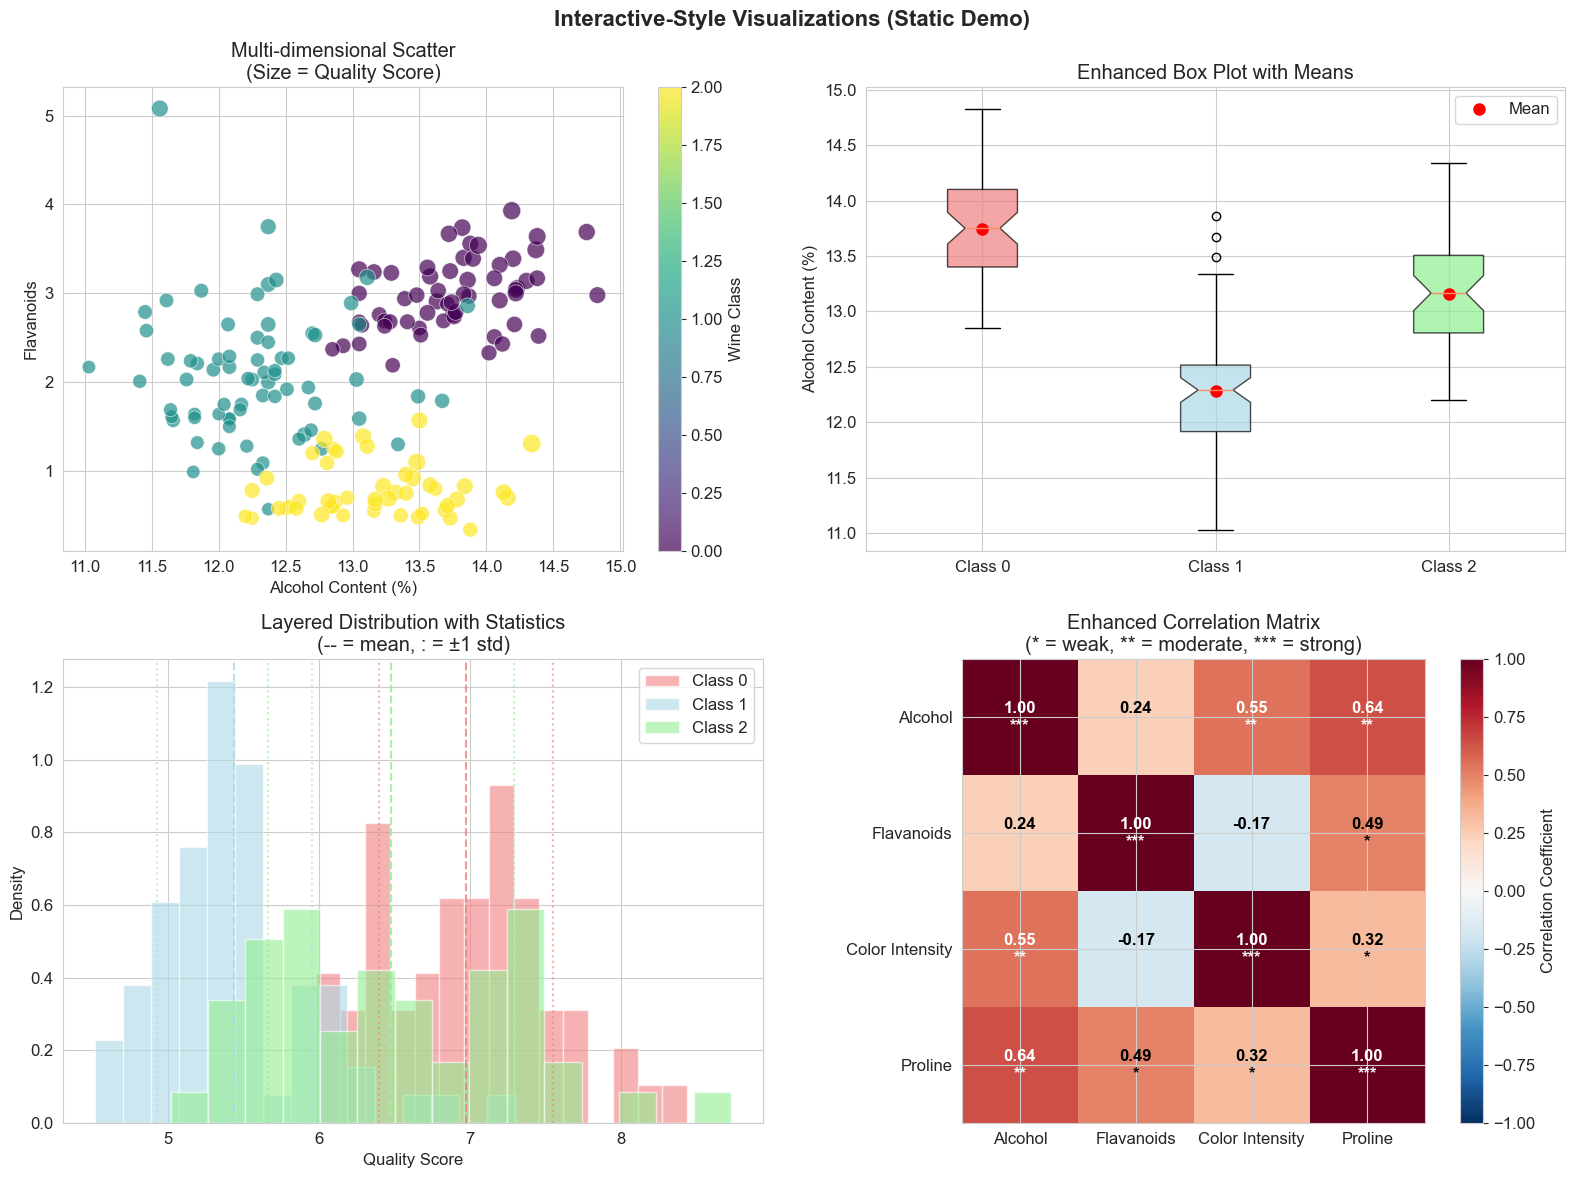

✅ Interactive-style visualizations demonstrated!
🎯 Interactive features simulated:
   📏 Size mapping for additional dimensions
   📊 Statistical annotations and overlays
   🎨 Multi-layer information display
   🔍 Enhanced detail and hover-like information

💡 For true interactivity, use:
   - Plotly for web-based interactive plots
   - Bokeh for interactive dashboards
   - Matplotlib widgets for desktop interactivity


In [6]:
print("🚀 INTERACTIVE VISUALIZATION CONCEPTS")
print("=" * 40)

# Note: In a real environment, you would install plotly with: pip install plotly
# For this workshop, we'll demonstrate the concepts and show static examples

print("📝 Interactive Visualization Code Examples:")
print("\n1. Interactive Scatter Plot with Plotly:")
print("""
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(wine_df, 
                x='alcohol', 
                y='flavanoids',
                color='target_name',
                size='quality_score',
                hover_data=['color_intensity', 'proline'],
                title='Interactive Wine Feature Analysis')
fig.show()
""")

print("\n2. Interactive 3D Scatter Plot:")
print("""
# 3D scatter plot
fig = px.scatter_3d(wine_df,
                   x='alcohol',
                   y='flavanoids', 
                   z='color_intensity',
                   color='target_name',
                   size='quality_score',
                   title='3D Wine Feature Space')
fig.show()
""")

# Create static versions demonstrating interactive concepts
print("\n🎨 Interactive-Style Visualizations (Static Demo):")

# Simulate interactive features with enhanced matplotlib
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Interactive-Style Visualizations (Static Demo)', fontsize=16, fontweight='bold')

# 1. Enhanced scatter with size and color mapping
scatter = axes[0, 0].scatter(wine_df['alcohol'], wine_df['flavanoids'],
                           c=wine_df['target'], 
                           s=wine_df['quality_score'] * 20,  # Size mapping
                           cmap='viridis', alpha=0.7, 
                           edgecolors='white', linewidth=0.5)
axes[0, 0].set_xlabel('Alcohol Content (%)')
axes[0, 0].set_ylabel('Flavanoids')
axes[0, 0].set_title('Multi-dimensional Scatter\n(Size = Quality Score)')
plt.colorbar(scatter, ax=axes[0, 0], label='Wine Class')

# 2. Box plot with statistical annotations
bp = axes[0, 1].boxplot([wine_df[wine_df['target_name'] == cls]['alcohol'] 
                        for cls in wine_df['target_name'].unique()],
                       labels=wine_df['target_name'].unique(),
                       patch_artist=True, notch=True)

colors = ['lightcoral', 'lightblue', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Add mean markers
for i, cls in enumerate(wine_df['target_name'].unique()):
    mean_val = wine_df[wine_df['target_name'] == cls]['alcohol'].mean()
    axes[0, 1].plot(i+1, mean_val, 'ro', markersize=8, label='Mean' if i == 0 else "")

axes[0, 1].set_title('Enhanced Box Plot with Means')
axes[0, 1].set_ylabel('Alcohol Content (%)')
axes[0, 1].legend()

# 3. Layered histogram with statistics
for i, class_name in enumerate(wine_df['target_name'].unique()):
    class_data = wine_df[wine_df['target_name'] == class_name]['quality_score']
    axes[1, 0].hist(class_data, alpha=0.6, bins=15, label=class_name, 
                   color=colors[i], density=True)
    
    # Add mean and std lines
    mean_val = class_data.mean()
    std_val = class_data.std()
    axes[1, 0].axvline(mean_val, color=colors[i], linestyle='--', alpha=0.8)
    axes[1, 0].axvline(mean_val - std_val, color=colors[i], linestyle=':', alpha=0.6)
    axes[1, 0].axvline(mean_val + std_val, color=colors[i], linestyle=':', alpha=0.6)

axes[1, 0].set_xlabel('Quality Score')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Layered Distribution with Statistics\n(-- = mean, : = ±1 std)')
axes[1, 0].legend()

# 4. Enhanced correlation with significance indicators
corr_features = ['alcohol', 'flavanoids', 'color_intensity', 'proline']
corr_matrix = wine_df[corr_features].corr()

im = axes[1, 1].imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
axes[1, 1].set_xticks(range(len(corr_features)))
axes[1, 1].set_yticks(range(len(corr_features)))
axes[1, 1].set_xticklabels([f.replace('_', ' ').title() for f in corr_features])
axes[1, 1].set_yticklabels([f.replace('_', ' ').title() for f in corr_features])

# Add correlation values and significance indicators
for i in range(len(corr_features)):
    for j in range(len(corr_features)):
        corr_val = corr_matrix.iloc[i, j]
        text_color = 'white' if abs(corr_val) > 0.5 else 'black'
        significance = '***' if abs(corr_val) > 0.7 else '**' if abs(corr_val) > 0.5 else '*' if abs(corr_val) > 0.3 else ''
        axes[1, 1].text(j, i, f'{corr_val:.2f}\n{significance}',
                       ha='center', va='center', color=text_color, fontweight='bold')

axes[1, 1].set_title('Enhanced Correlation Matrix\n(* = weak, ** = moderate, *** = strong)')
plt.colorbar(im, ax=axes[1, 1], label='Correlation Coefficient')

plt.tight_layout()
plt.show()

print("✅ Interactive-style visualizations demonstrated!")
print("🎯 Interactive features simulated:")
print("   📏 Size mapping for additional dimensions")
print("   📊 Statistical annotations and overlays")
print("   🎨 Multi-layer information display")
print("   🔍 Enhanced detail and hover-like information")
print("\n💡 For true interactivity, use:")
print("   - Plotly for web-based interactive plots")
print("   - Bokeh for interactive dashboards")
print("   - Matplotlib widgets for desktop interactivity")

## 7. Visualization Best Practices and Summary

🎓 VISUALIZATION BEST PRACTICES


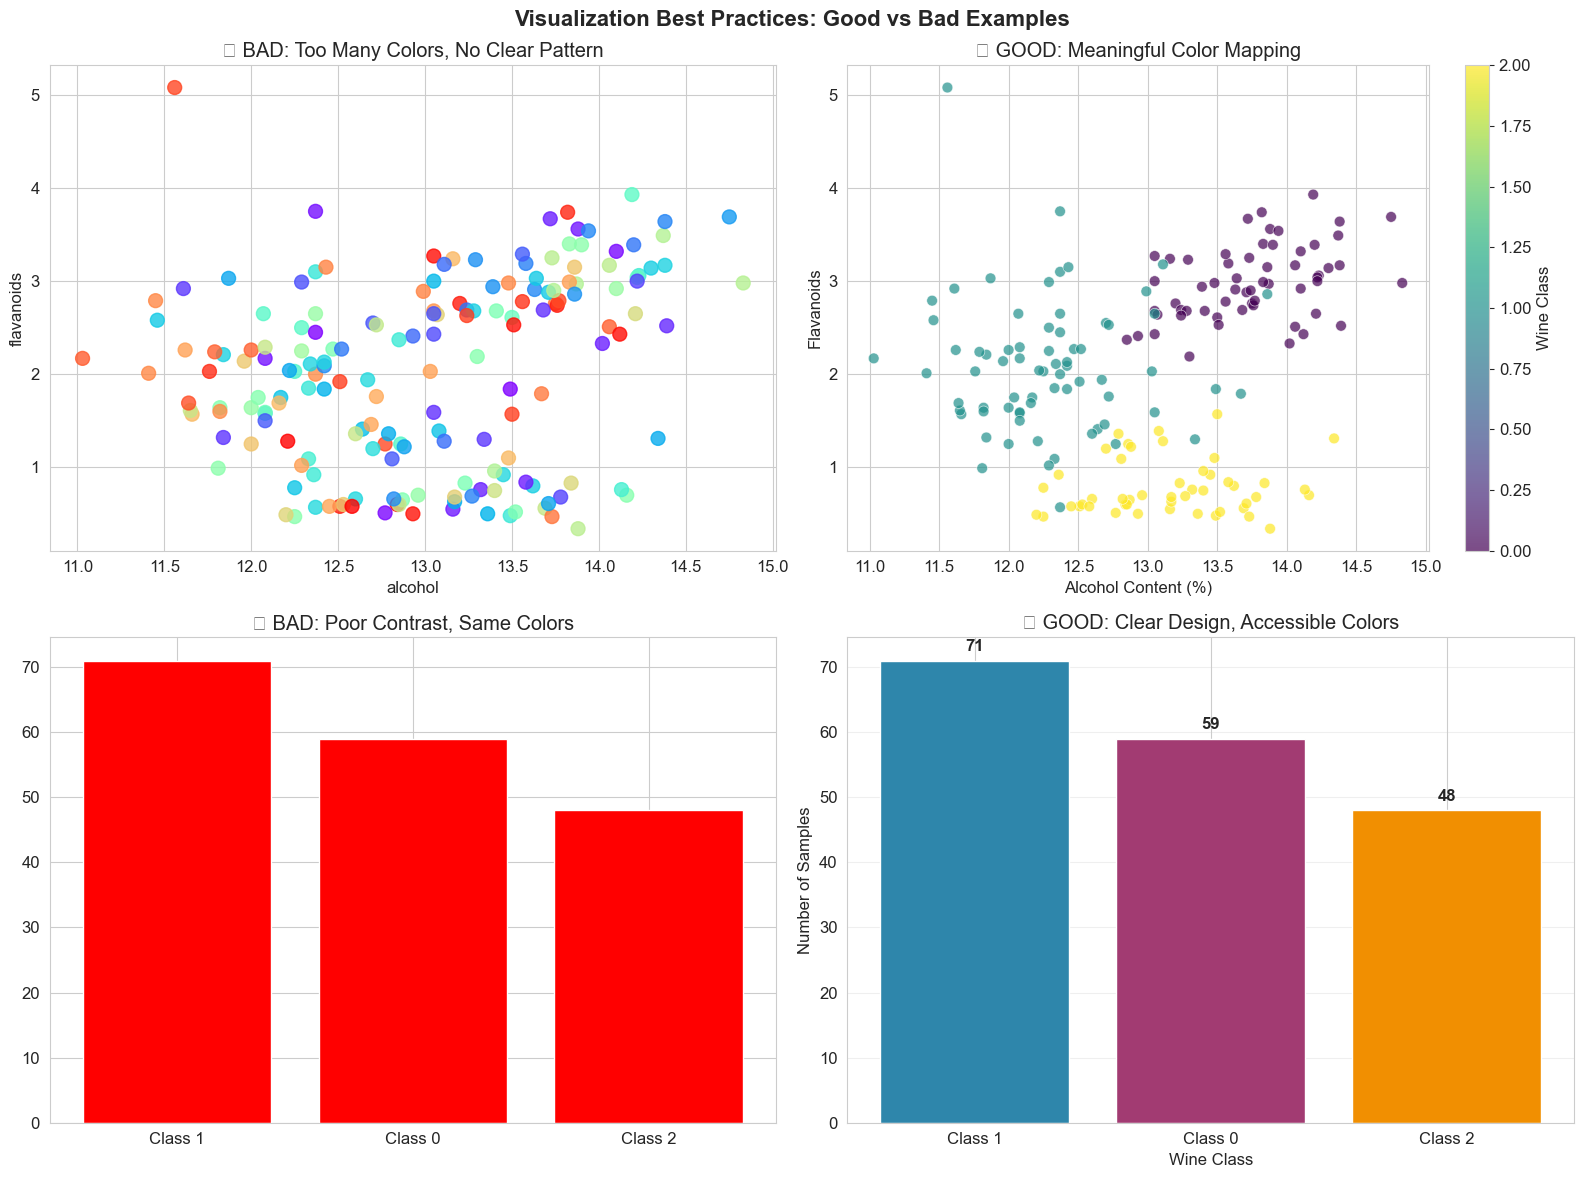


📋 VISUALIZATION BEST PRACTICES CHECKLIST:

🎨 Color:
   ✓ Use color purposefully (not just decoration)
   ✓ Ensure accessibility (colorblind-friendly palettes)
   ✓ Limit to 3-5 colors for categorical data
   ✓ Use consistent color schemes across related plots

📐 Layout:
   ✓ Ensure adequate white space
   ✓ Align elements consistently
   ✓ Use appropriate aspect ratios
   ✓ Size elements proportionally

🏷️ Labels:
   ✓ Include clear, descriptive titles
   ✓ Label all axes with units
   ✓ Use legends when necessary
   ✓ Add context and annotations

📊 Data:
   ✓ Choose appropriate chart types
   ✓ Avoid chartjunk and unnecessary elements
   ✓ Show data accurately (no misleading scales)
   ✓ Include uncertainty when relevant

👥 Audience:
   ✓ Consider your audience's expertise
   ✓ Highlight key insights
   ✓ Provide context and interpretation
   ✓ Make actionable recommendations clear

🎯 CHART SELECTION GUIDE:
Comparison  : Bar charts, column charts, dot plots
Distribution: Histograms, 

In [7]:
print("🎓 VISUALIZATION BEST PRACTICES")
print("=" * 35)

# Create a figure demonstrating good vs bad practices
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Visualization Best Practices: Good vs Bad Examples', 
             fontsize=16, fontweight='bold')

# BAD: Too many colors, no clear message
np.random.seed(42)
random_colors = np.random.rand(len(wine_df))
axes[0, 0].scatter(wine_df['alcohol'], wine_df['flavanoids'], 
                  c=random_colors, cmap='rainbow', s=100, alpha=0.8)
axes[0, 0].set_title('❌ BAD: Too Many Colors, No Clear Pattern')
axes[0, 0].set_xlabel('alcohol')
axes[0, 0].set_ylabel('flavanoids')

# GOOD: Clear color mapping with purpose
scatter = axes[0, 1].scatter(wine_df['alcohol'], wine_df['flavanoids'], 
                           c=wine_df['target'], cmap='viridis', 
                           s=60, alpha=0.7, edgecolors='white', linewidth=0.5)
axes[0, 1].set_title('✅ GOOD: Meaningful Color Mapping')
axes[0, 1].set_xlabel('Alcohol Content (%)')
axes[0, 1].set_ylabel('Flavanoids')
cbar = plt.colorbar(scatter, ax=axes[0, 1])
cbar.set_label('Wine Class')

# BAD: Poor readability
axes[1, 0].bar(wine_df['target_name'].value_counts().index, 
              wine_df['target_name'].value_counts().values,
              color=['red', 'red', 'red'])  # Same color
axes[1, 0].set_title('❌ BAD: Poor Contrast, Same Colors')
# No axis labels, poor contrast

# GOOD: Clear, accessible design
class_counts = wine_df['target_name'].value_counts()
bars = axes[1, 1].bar(class_counts.index, class_counts.values,
                     color=['#2E86AB', '#A23B72', '#F18F01'], 
                     edgecolor='white', linewidth=1)
axes[1, 1].set_title('✅ GOOD: Clear Design, Accessible Colors')
axes[1, 1].set_xlabel('Wine Class')
axes[1, 1].set_ylabel('Number of Samples')
axes[1, 1].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📋 VISUALIZATION BEST PRACTICES CHECKLIST:")
print("=" * 45)

best_practices = {
    "🎨 Color": [
        "Use color purposefully (not just decoration)",
        "Ensure accessibility (colorblind-friendly palettes)",
        "Limit to 3-5 colors for categorical data",
        "Use consistent color schemes across related plots"
    ],
    "📐 Layout": [
        "Ensure adequate white space",
        "Align elements consistently",
        "Use appropriate aspect ratios",
        "Size elements proportionally"
    ],
    "🏷️ Labels": [
        "Include clear, descriptive titles",
        "Label all axes with units",
        "Use legends when necessary",
        "Add context and annotations"
    ],
    "📊 Data": [
        "Choose appropriate chart types",
        "Avoid chartjunk and unnecessary elements",
        "Show data accurately (no misleading scales)",
        "Include uncertainty when relevant"
    ],
    "👥 Audience": [
        "Consider your audience's expertise",
        "Highlight key insights",
        "Provide context and interpretation",
        "Make actionable recommendations clear"
    ]
}

for category, practices in best_practices.items():
    print(f"\n{category}:")
    for practice in practices:
        print(f"   ✓ {practice}")

print("\n🎯 CHART SELECTION GUIDE:")
print("=" * 25)

chart_guide = {
    "Comparison": "Bar charts, column charts, dot plots",
    "Distribution": "Histograms, box plots, violin plots, density plots",
    "Relationship": "Scatter plots, line charts, correlation matrices",
    "Composition": "Pie charts, stacked bars, treemaps",
    "Trend": "Line charts, area charts, slope graphs",
    "Geographic": "Maps, choropleth, cartograms",
    "Hierarchical": "Tree diagrams, sunburst, dendrogram"
}

for purpose, charts in chart_guide.items():
    print(f"{purpose:12}: {charts}")

print("\n🏆 WORKSHOP VISUALIZATION SUMMARY:")
print("=" * 35)
print("✅ Completed visualization techniques:")
print("   📊 Essential chart types (6 types)")
print("   🎨 Advanced seaborn plots (9 variations)")
print("   📈 Statistical visualizations (4 types)")
print("   🎯 Publication-ready formatting")
print("   🚀 Interactive plot concepts")
print("   📋 Best practices and guidelines")

print("\n💡 Next Steps:")
print("   🔧 Practice with your own datasets")
print("   📚 Explore Plotly for interactivity")
print("   🎨 Develop your visualization style")
print("   📊 Build a portfolio of effective plots")

print("\n🎉 Ready to create compelling data stories!")
print("\n✨ Visualization mastery achieved!")
print("You now have the skills to create professional, publication-ready visualizations.")
print("Remember: Great visualizations tell a story and guide the viewer to insights.")